In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.19.0'

In [11]:
!wget https://raw.githubusercontent.com/TeomanEgeSelcuk/R-Housing-Price-Predictions/master/kc_house_data.csv -O kc-house-data.csv


--2025-09-04 22:18:56--  https://raw.githubusercontent.com/TeomanEgeSelcuk/R-Housing-Price-Predictions/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2205038 (2.1M) [text/plain]
Saving to: ‘kc-house-data.csv’

kc-house-data.csv   100%[===================>]   2.10M  --.-KB/s    in 0.07s   

2025-09-04 22:18:56 (30.6 MB/s) - ‘kc-house-data.csv’ saved [2205038/2205038]



In [12]:
import pandas as pd

# Lendo o arquivo baixado
house_df = pd.read_csv("kc-house-data.csv", encoding="ISO-8859-1")

# Visualizando as 5 primeiras linhas
house_df.head()


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [13]:
house_df.tail(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
21587  7852140040   8/25/2014   507250.0         3       2.50         2270   
21588  9834201367   1/26/2015   429000.0         3       2.00         1490   
21589  3448900210  10/14/2014   610685.0         4       2.50         2520   
21590  7936000429   3/26/2015  1010000.0         4       3.50         3510   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21595   291310100   1/16/2015   400000.0         3       2.50         1600   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21587      5536     2.0           0     0  ...      8        2270   
21588      1126     3.0           0     0  ...      8        1490   
21589      6023     2.0           0     0  ...      9        2520   
21590      7200     2.0           0     0  ...      9        2600   
21591      1294     2.0           0     0  ...      8        1180   
21592      1131     3.0           0     0  ...      8        1530   
21593      5813     2.0           0     0  ...      8        2310   
21594      1350     2.0           0     0  ...      7        1020   
21595      2388     2.0           0     0  ...      8        1600   
21596      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
21587              0      2003             0    98065  47.5389 -121.881   
21588              0      2014             0    98144  47.5699 -122.288   
21589              0      2014             0    98056  47.5137 -122.167   
21590            910      2009             0    98136  47.5537 -122.398   
21591            130      2008             0    98116  47.5773 -122.409   
21592              0      2009             0    98103  47.6993 -122.346   
21593              0      2014             0    98146  47.5107 -122.362   
21594              0      2009             0    98144  47.5944 -122.299   
21595              0      2004             0    98027  47.5345 -122.069   
21596              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21587           2270        5731  
21588           1400        1230  
21589           2520        6023  
21590           2050        6200  
21591           1330        1265  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[10 rows x 21 columns]

In [14]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [15]:
house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

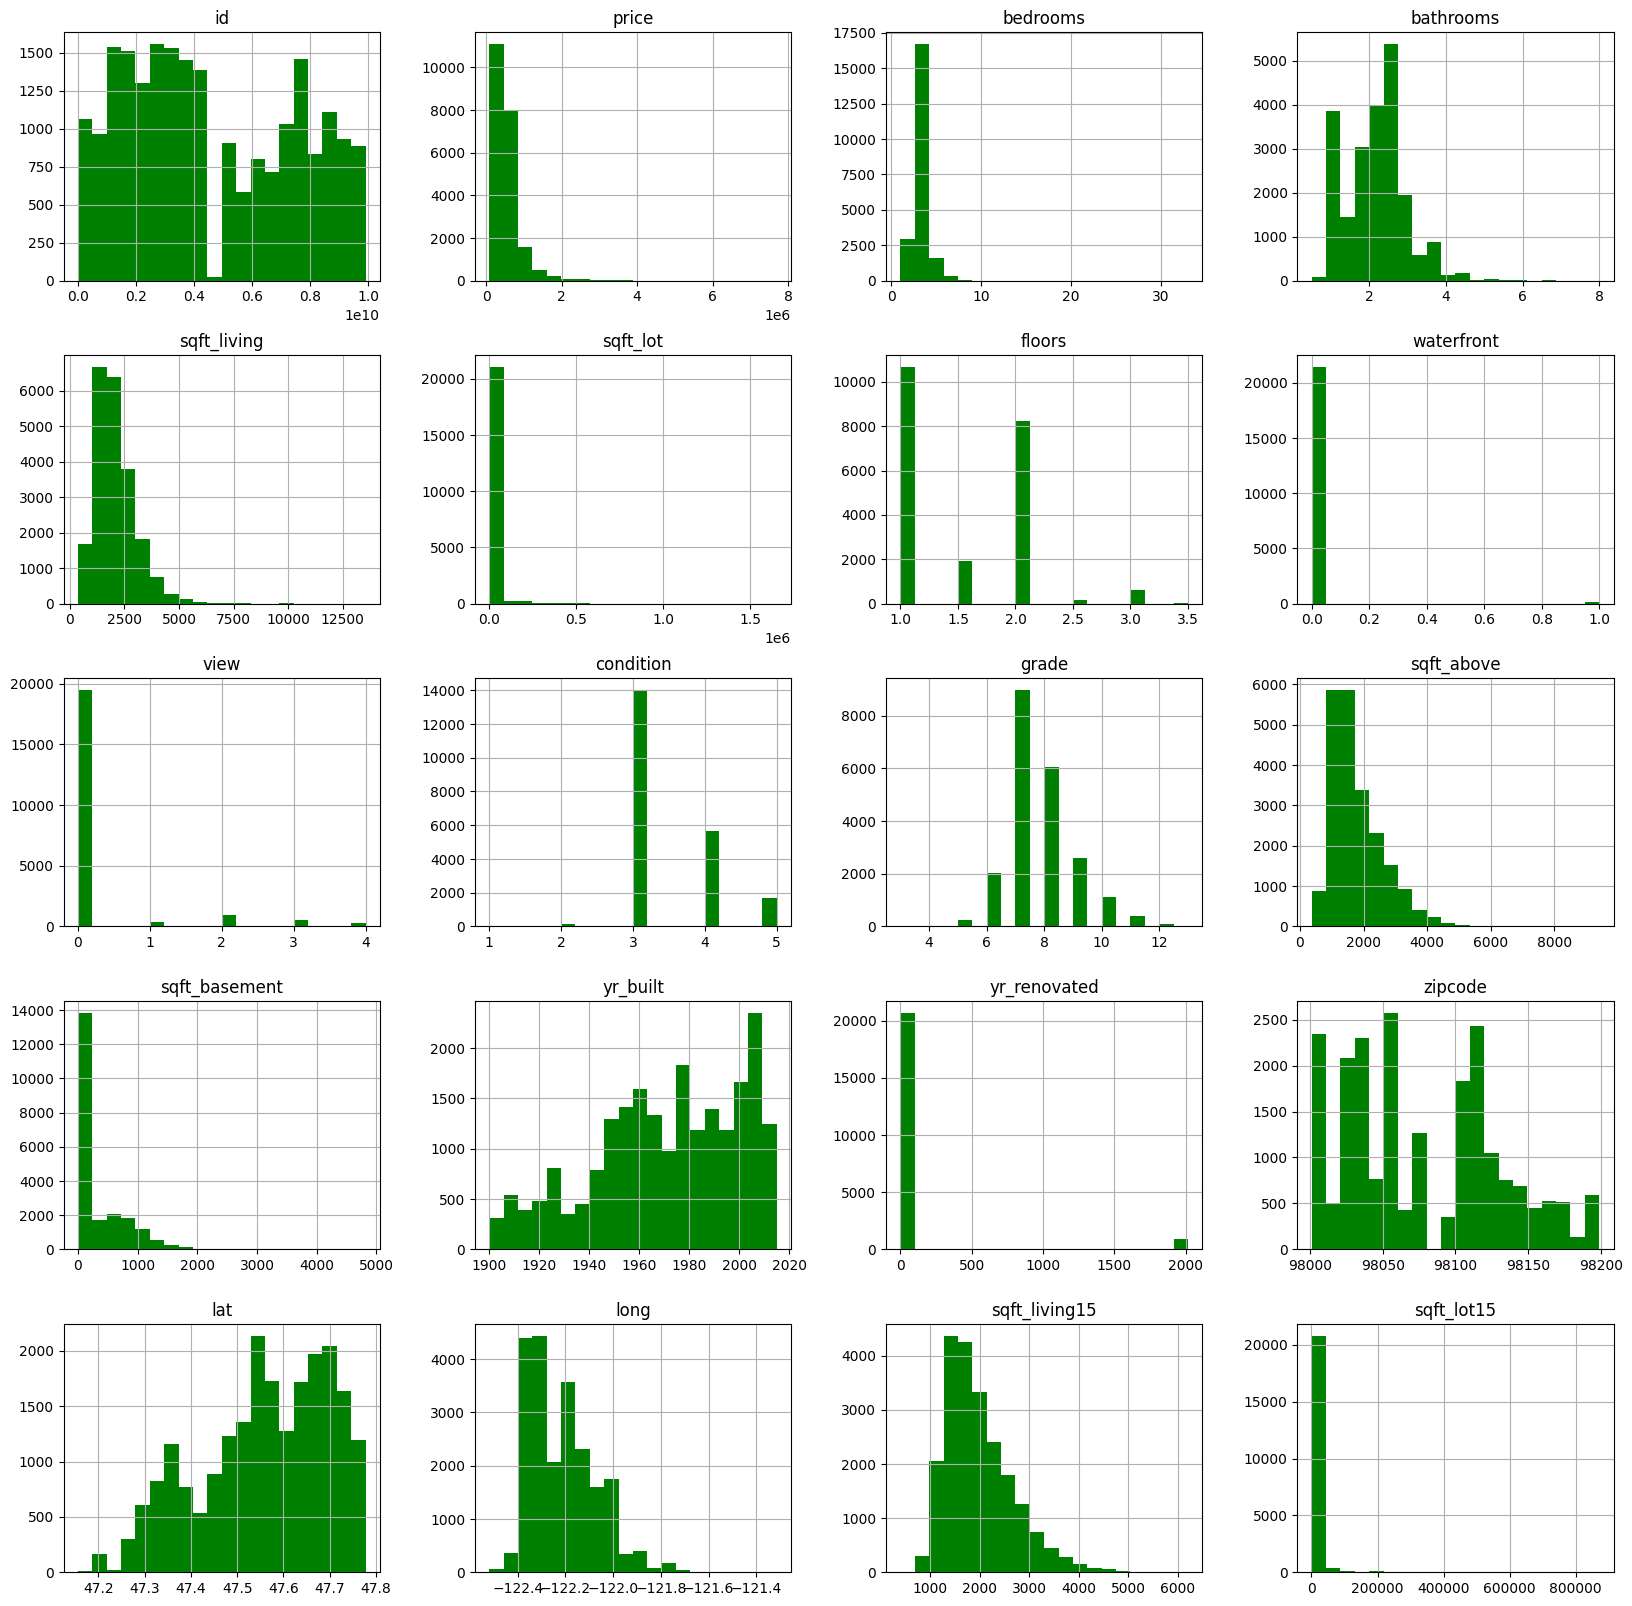

In [16]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g');

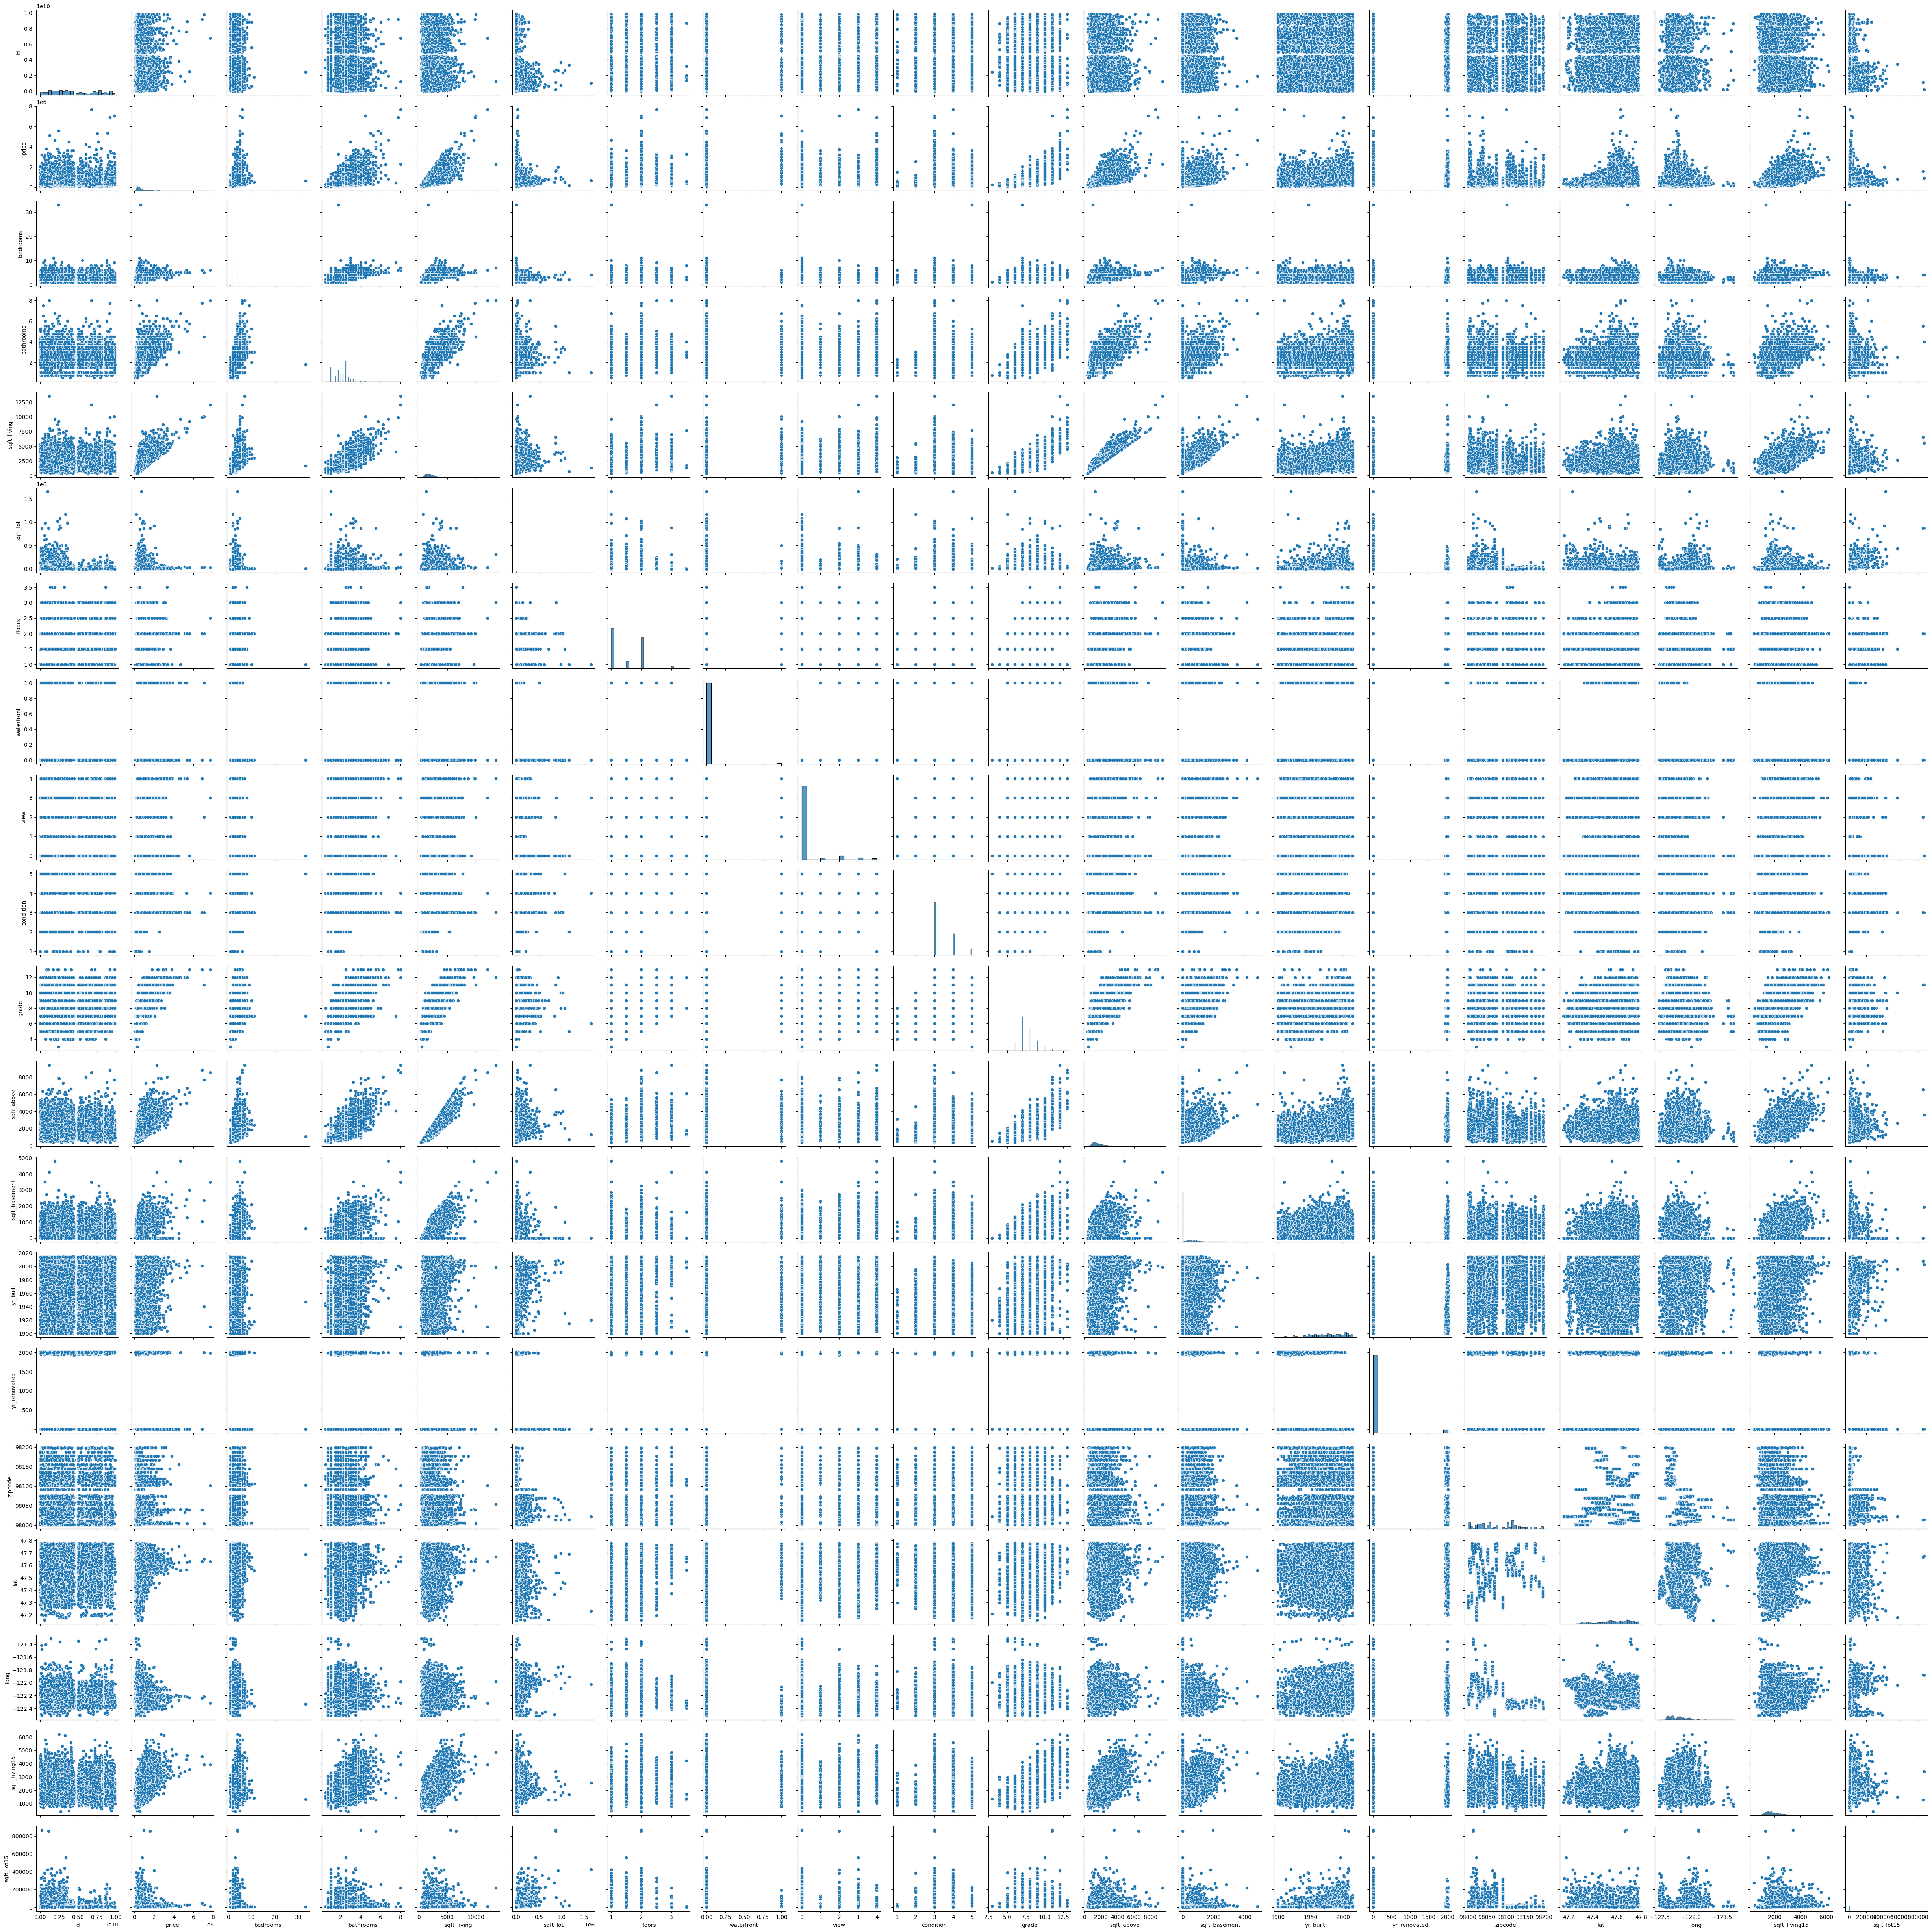

In [17]:
sns.pairplot(house_df);

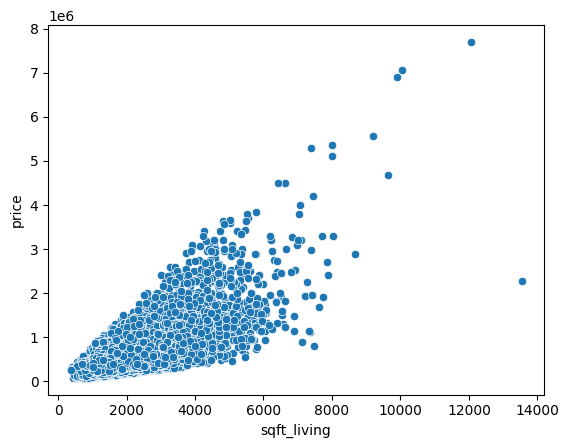

In [18]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

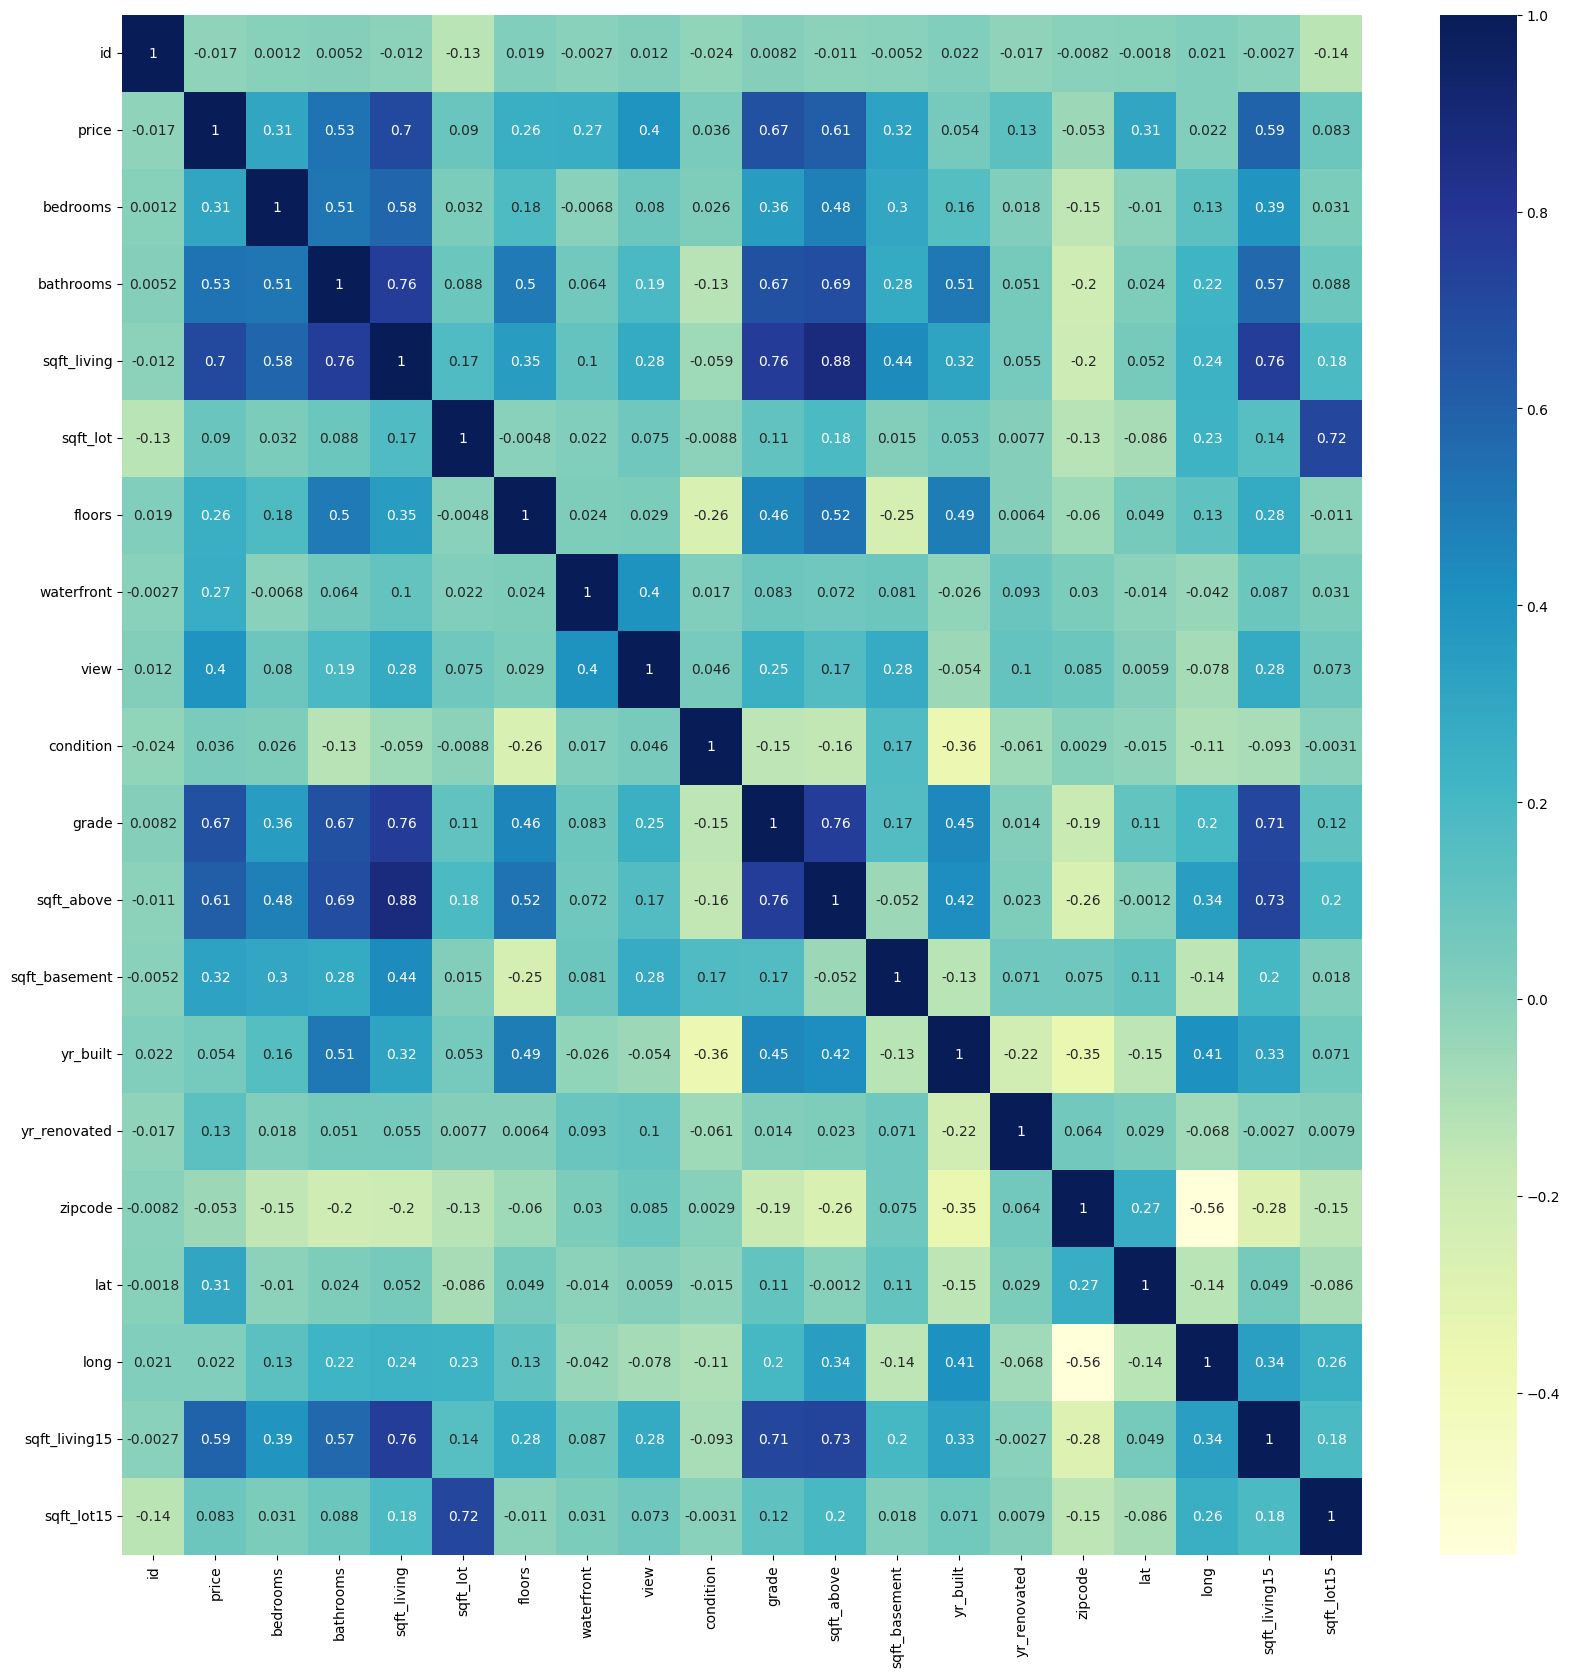

In [19]:
f, ax = plt.subplots(figsize = (20, 20))
# adiconado: dropou a coluna date
house_df = house_df.drop(columns=['date']);
sns.heatmap(house_df.corr(), annot = True, cmap="YlGnBu");

Etapa 4: Tratamento da base de dados

4.1: Tratamento da base de dados

Sugestões de teste:

0: sqft_lot:
1: sqft_living:
2: sqft_living e grade:
3: sqft_living e bedrooms:
4: sqft_living e bedrooms e sqft_above:
Obs.: Testar se a feature "sqft_living" com "sqft_above" ou "sqft_basement"

In [20]:
#selected_features = ['sqft_living', 'grade', 'bedrooms']
#selected_features = ['sqft_living', 'sqft_above', 'sqft_living15']
#selected_features = ['sqft_living', 'sqft_basement']
selected_features = ['sqft_living', 'view', 'grade', 'condition', 'floors']


In [21]:
X = house_df[selected_features]

In [22]:
X.head()

sqft_living  view  grade  condition  floors
0         1180     0      7          3     1.0
1         2570     0      7          3     2.0
2          770     0      6          3     1.0
3         1960     0      7          5     1.0
4         1680     0      8          3     1.0

In [23]:
y = house_df['price']

In [24]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [25]:
X.shape

(21597, 5)

In [26]:
y.shape

(21597,)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[0.06150342, 0.        , 0.4       , 0.5       , 0.        ],
       [0.16704632, 0.        , 0.4       , 0.5       , 0.4       ],
       [0.03037206, 0.        , 0.3       , 0.5       , 0.        ],
       ...,
       [0.04935459, 0.        , 0.4       , 0.5       , 0.4       ],
       [0.09339408, 0.        , 0.5       , 0.5       , 0.4       ],
       [0.04935459, 0.        , 0.4       , 0.5       , 0.4       ]])

In [29]:
X_scaled.shape

(21597, 5)

In [30]:
scaler.data_max_

array([1.354e+04, 4.000e+00, 1.300e+01, 5.000e+00, 3.500e+00])

In [31]:
scaler.data_min_

array([370.,   0.,   3.,   1.,   1.])

In [32]:
y = y.values.reshape(-1,1)

In [33]:
y.shape

(21597, 1)

In [34]:
y_scaled = scaler.fit_transform(y)

In [35]:
y_scaled

array([[0.01887956],
       [0.06035161],
       [0.01338231],
       ...,
       [0.04252178],
       [0.04224613],
       [0.03240619]])

4.2: Criação do dataset de treino (75%) e teste (25%)

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [37]:
X_train.shape

(16197, 5)

In [38]:
X_train[1]

array([0.11313591, 0.        , 0.4       , 0.5       , 0.4       ])

In [39]:
X_test.shape

(5400, 5)

In [40]:
X_test

array([[0.27258922, 0.        , 0.6       , 0.5       , 0.4       ],
       [0.12908125, 0.        , 0.5       , 1.        , 0.        ],
       [0.20652999, 0.        , 0.7       , 0.5       , 0.4       ],
       ...,
       [0.08124525, 0.        , 0.5       , 0.5       , 0.        ],
       [0.14730448, 0.25      , 0.6       , 0.75      , 0.4       ],
       [0.07744875, 0.        , 0.3       , 0.5       , 0.        ]])

Etapa 5: Construção da Rede Neural e criação do modelo

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(5,)),            # define a entrada
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,901 (81.64 KB)

 Trainable params: 20,901 (81.64 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='Adam', loss='mean_squared_error')


In [45]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2854e-04 - val_loss: 9.3519e-04
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7520e-04 - val_loss: 0.0011
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.6148e-04 - val_loss: 9.7870e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.2032e-04 - val_loss: 9.8392e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.4236e-04 - val_loss: 0.0010
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8654e-04 - val_loss: 0.0011
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6054e-04 - val_loss: 0.0012
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0914e-04 - val_loss: 0.0010
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6740e-04 - val_loss: 0.0011
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8560e-04 - val_lo

Etapa 6: Avaliação do modelo

6.1: Exibir a progressão do erro

In [46]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

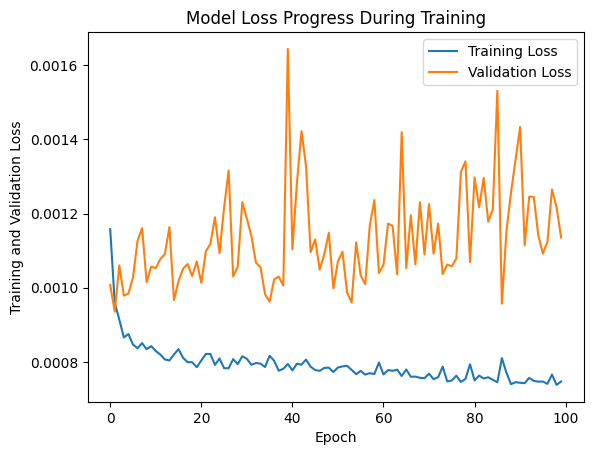

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);


6.3 Avaliação do dataset de teste (criado lá em cima)
Vou aplicar o modelo no dataset desconhecido e ver se acertou (preciso gerar o accuracy depois!!)

In [49]:
X_test.shape

(5400, 5)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


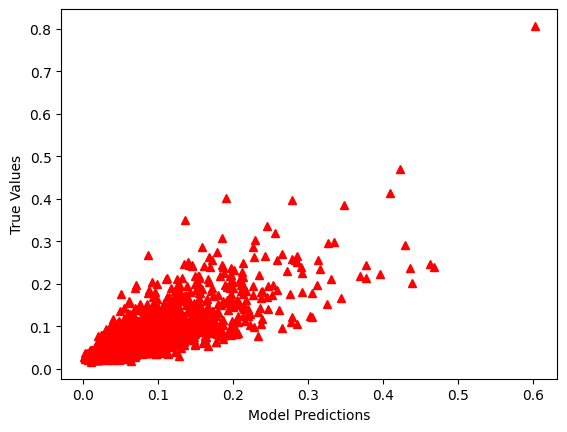

In [50]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [51]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

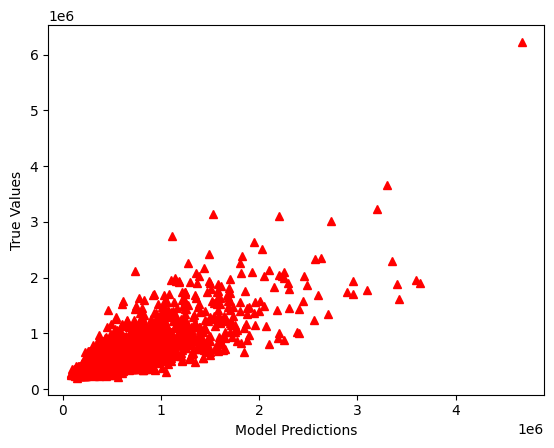

In [52]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [53]:
k = X_test.shape[1]
n = len(X_test)
n

5400

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 206949.468 
MSE = 42828082405.53514 
MAE = 138542.85095775462 
R2 = 0.6402455606451438 
Adjusted R2 = 0.6399120841533429
